# Проект "Принятие решений в бизнесе"

**Описание и цель проекта**: Вместе с отделом маркетинга был подготовлен список гипотез для увеличения выручки крупного интернет-магазина. Для этого, проведем предобработку данных, приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты. 

**Описание данных**:

Датасет hypothesis.csv:
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Датасет orders.csv:
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Датасет visitors.csv:
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста.

In [1]:
# импорт библиотек
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

## Загрузка данных

In [2]:
# считаем CSV-файлы с данными с помощью библиотеки pandas и сохраним в датафреймы
hypothesis = pd.read_csv('/Users/numberone/Documents/Projects/datasets/hypothesis.csv')
orders = pd.read_csv('/Users/numberone/Documents/Projects/datasets/orders.csv')
visitors = pd.read_csv('/Users/numberone/Documents/Projects/datasets/visitors.csv')

In [3]:
# увеличим ширину столбцов, в которых не помещается вся информация 
pd.options.display.max_colwidth = 1

In [4]:
# выведем первые 10 cтрок таблицы hypothesis
display(hypothesis.head(10))

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
# посмотрим общую информацию о таблице hypothesis
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [6]:
# выведем первые 10 cтрок таблицы orders
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [7]:
# посмотрим общую информацию о таблице orders
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
# выведем первые 10 cтрок таблицы visitors
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [9]:
# посмотрим общую информацию о таблице visitors
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


**Вывод**

Видим в данных hypothesis 9 строк и 5 столбцов, вес датафрейма - 488.0+ bytes; столбцы Reach, Impact, Confidence и Efforts - имеют тип данных int64; столбец Hypothesis имеет тип данных - object. Необходимо привести к нижнему регистру наименования столбцов.

Видим в данных orders 1197 cтрок и 5 столбцов, вес датафрейма - 46.9+ KB; столбцы transactionId, visitorId и revenue имеют тип данных - int64; столбцы date и group - имеют тип данных object. Необходимо тип данных столбца date изменить на datetime64. Также необходимо привести к нижнему регистру наименования столбцов transactionId и 	visitorId.

Видим в данных visitors 62 строки и 3 столбца, вес датафрейма - 1.6+ KB; столбцы date и group имеют тип данных - object; столбец visitors имеет тип данных - int64. Необходимо тип данных столбца date изменить на datetime64.

Проверим наличие пропусков и дубликатов в следующем разделе.

## Предобработка данных

### Замена названия столбцов (приведение к нижнему регистру)

In [10]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.head()

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [11]:
orders.columns = [name.replace('Id', '_id') for name in orders.columns]
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


### Замена типа данных

In [12]:
# заменим тип данных для orders['date'] и visitors['date']
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

# проверим
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


### Проверка наличия пропущенных значений и дубликатов в датафреймах и их обработка

In [13]:
# посчитаем количество пропущенных значений в датафреймах
print(f'Количество пропущенных значений в hypothesis: {hypothesis.isna().sum().sum()}')
print(f'Количество пропущенных значений в orders: {orders.isna().sum().sum()}')
print(f'Количество пропущенных значений в visitors: {visitors.isna().sum().sum()}')

Количество пропущенных значений в hypothesis: 0
Количество пропущенных значений в orders: 0
Количество пропущенных значений в visitors: 0


In [14]:
# посчитаем количество дубликатов в датафреймах
print(f'Количество дубликатов в hypothesis: {hypothesis.duplicated().sum()}')
print(f'Количество дубликатов в orders: {orders.duplicated().sum()}')
print(f'Количество дубликатов в visitors: {visitors.duplicated().sum()}')

Количество дубликатов в hypothesis: 0
Количество дубликатов в orders: 0
Количество дубликатов в visitors: 0


In [15]:
# проверим наличие пользователей, которые попали в два теста одновременно в датафрейме orders
group_a = orders[orders['group'] == 'A']['visitor_id']
group_b = orders[orders['group'] == 'B']['visitor_id']
group_orders = orders.query('visitor_id in @group_a and visitor_id in @group_b')
print('Количество пользователей в двух группах:', group_orders['visitor_id'].nunique())

Количество пользователей в двух группах: 58


In [16]:
# посчитаем процент этих пользователей от всего датафрейма orders
'{:.1%}'.format(group_orders['visitor_id'].nunique()/orders['visitor_id'].count())

'4.8%'

In [17]:
# посмотрим на количество уникальных пользователей по группам
orders.groupby('group').nunique('visitor_id')['visitor_id']

group
A    503
B    586
Name: visitor_id, dtype: int64

In [18]:
# удалим строки с задублированными пользователями, будет потерено 4.8% строк с данными, что не является критичным
orders = orders.query('visitor_id not in @group_orders["visitor_id"]')
# проверим
orders.groupby('group').nunique('visitor_id')['visitor_id']

group
A    445
B    528
Name: visitor_id, dtype: int64

**Вывод**

Провели предобработку данных, а именно привели наименования столбцов к 'хорошему стилю'; заменили тип данных, где требовалось; проверили на наличие пропущенных значений и дубликатов; выявили задублированных пользователей, а именно 4.8% от датафрейма orders и удалили их для корректности дальнейших действий.

## Приоритизация гипотез

### Применение фреймворка ICE

In [19]:
hypothesis['ICE'] = (hypothesis['impact']*hypothesis['confidence']) / hypothesis['efforts']   
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending = False).round(1)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


### Применение фреймворка RICE

In [20]:
hypothesis['RICE'] = (hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending = False).round(1)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


### Как изменялась приоритизация гипотез при применении фреймворков

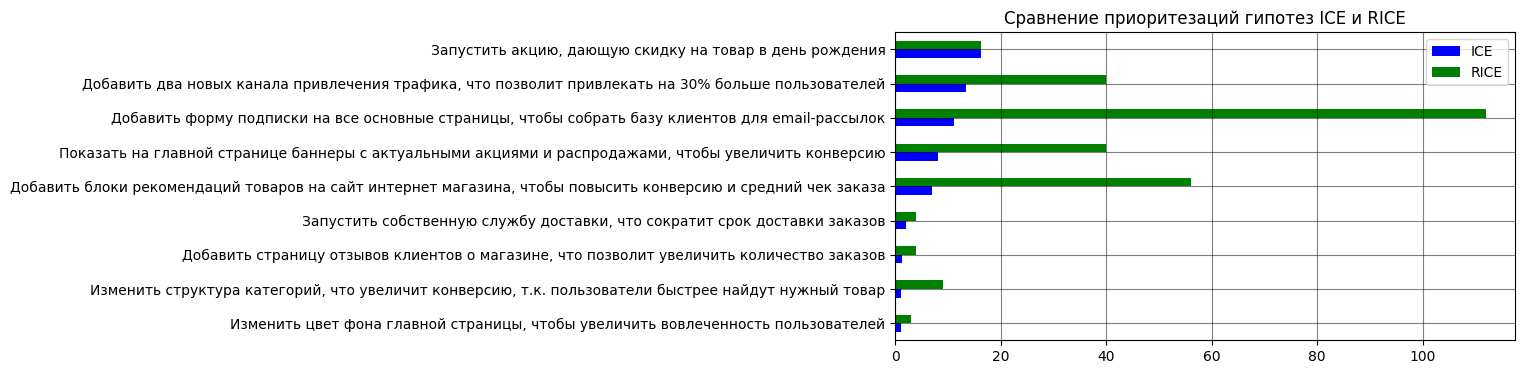

In [21]:
#  посмотрим на визуализации как изменилась приоритезация гипотез при применении RICE вместо ICE
ax = hypothesis[['hypothesis', 'ICE', 'RICE']].sort_values(by=['ICE']) \
                                      .set_index('hypothesis') \
                                      .plot(kind='barh', figsize=(8,4), color = ['b', 'g'], alpha = 1)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Сравнение приоритезаций гипотез ICE и RICE')
plt.grid(b=True, color='black', alpha=0.5)
plt.show()

**Вывод**

Видим, что при применении ICE лидируют гипотезы №8 и №0, а после применения RICE - №7 и №2. ICE учитывает такие показатели как 'влияние', 'ваша уверенность' и 'простата реализации'. Модель ICE позволяет провести быструю оценку приоритетности работы, однако субъективный взгляд оценивающего может привести к серьезным неточностям. ICE подойдет для первичной сортировки работы, хоть и без точных расчетов. Более сбалансированная модель RICE дает больше критериев оценки.
Модель RICE плюс еще учитывает охват клиентов, поэтому мы видим такое изменение приоритезации на нашем графике. Объективность оценки RICE повышается за счет четких количественных показателей трудозатрат и охвата.
Поэтому, рекомендуется в первую очередь протестировать гипотезы:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.


## Анализ А/В теста

### График кумулятивной выручки по группам

Чтобы построить графики, нужно собрать кумулятивные данные. Объявим датафрейм cumulativeData со столбцами: 

    date — дата;
    group — группа A/B-теста (A или B);
    orders — кумулятивное количество заказов на указанную дату в указанной группе;
    buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
    revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек);
    visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

In [22]:
# создаем массив уникальных пар значений дат и групп теста
dates_groups = orders[['date','group']].drop_duplicates()

# получим агрегированные кумулятивные по дням данные о заказах 
orders_aggregated = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],
                                                                       orders['group'] == x['group'])]
                                                                       .agg({'date' : 'max', 
                                                                             'group': 'max',
                                                                             'transaction_id': 'nunique',
                                                                             'visitor_id': 'nunique',
                                                                             'revenue': 'sum',
                                                                            }),
                                      axis=1).sort_values(by=['date','group'])

orders_aggregated.head(5)

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


In [23]:
# получим агрегированные кумулятивные по дням данные о пользователях 
visitors_aggregated = dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],
                                                                           visitors['group'] == x['group'])]
                                                                           .agg({'date' : 'max', 
                                                                                'group' : 'max', 
                                                                                'visitors' : 'sum'}), 
                                         axis=1).sort_values(by=['date','group'])

visitors_aggregated.head(5)

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [24]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulative_data.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


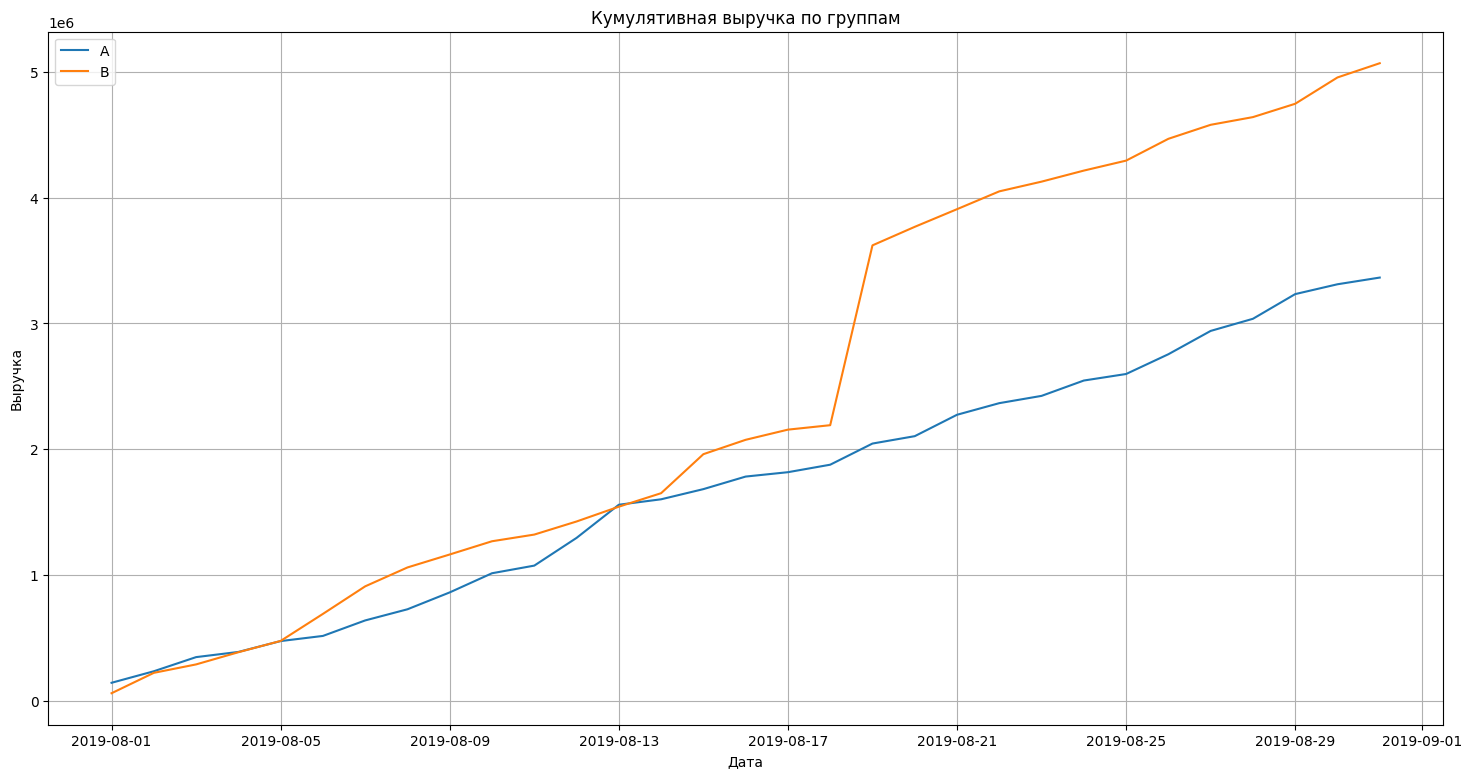

In [25]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

# строим график кумулятивной выручки по группам
plt.figure(figsize=(18,9))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.grid()
plt.legend();

**Вывод**

Видим, что выручка групп почти равномерно увеличивается в течение всего теста. Выручка группы А меньше выручки группы В соответственно. Также заметен резкий скачек кумулятивной выручки группы В с 18 августа 2019 года, это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. 

### График кумулятивного среднего чека по группам

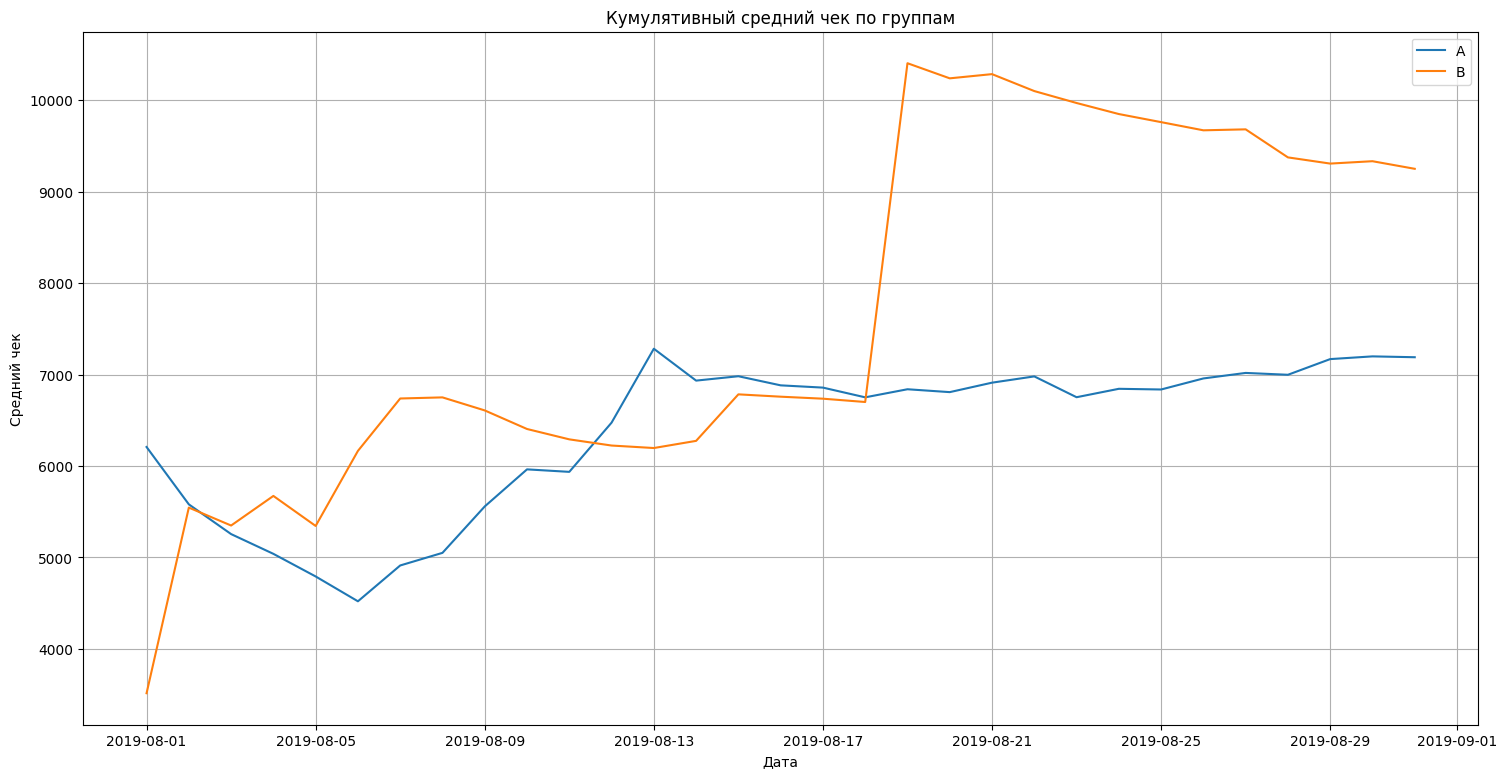

In [26]:
plt.figure(figsize=(18,9))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.grid()
plt.legend();

**Вывод**

Видим, что средний чек становится равномерным после середины теста: установился для группы A и продолжает падать для группы B. Наблюдается резкий скачек для группы В 18 августа 2019 года и затем постепенное падение. Возможно, в группу B в этот промежуток попали крупные заказы. Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

### График относительного изменения кумулятивного среднего чека группы B к группе A

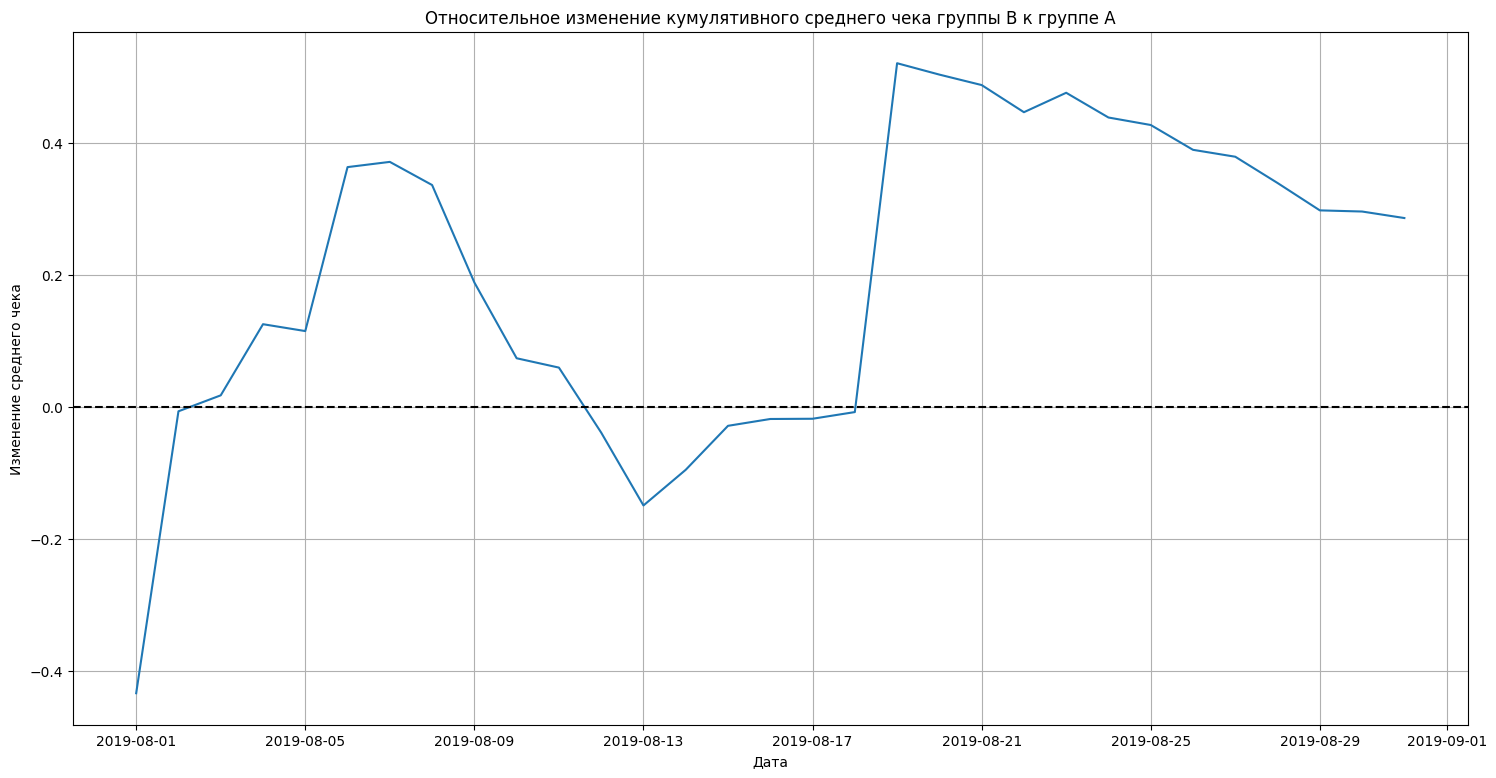

In [27]:
# собираем данные в одном датафрейме
merged_cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, left_on='date', right_on='date', 
                                                       how='left', suffixes=['_a', '_b'])

# cтроим отношение средних чеков
plt.figure(figsize=(18,9))
plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenue_b']/merged_cumulative_revenue['orders_b'])/
        (merged_cumulative_revenue['revenue_a']/merged_cumulative_revenue['orders_a'])-1)
plt.title('Относительное изменение кумулятивного среднего чека группы В к группе А')
plt.xlabel('Дата')
plt.ylabel('Изменение среднего чека')
plt.grid()

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

**Вывод**

В нескольких точках график различия между сегментами резко «скачет». Где-то точно спрятались крупные заказы и выбросы! 

### График кумулятивного среднего количества заказов на посетителя по группам

In [28]:
print(merged_cumulative_revenue['date'].min())
print(merged_cumulative_revenue['date'].max())

2019-08-01 00:00:00
2019-08-31 00:00:00


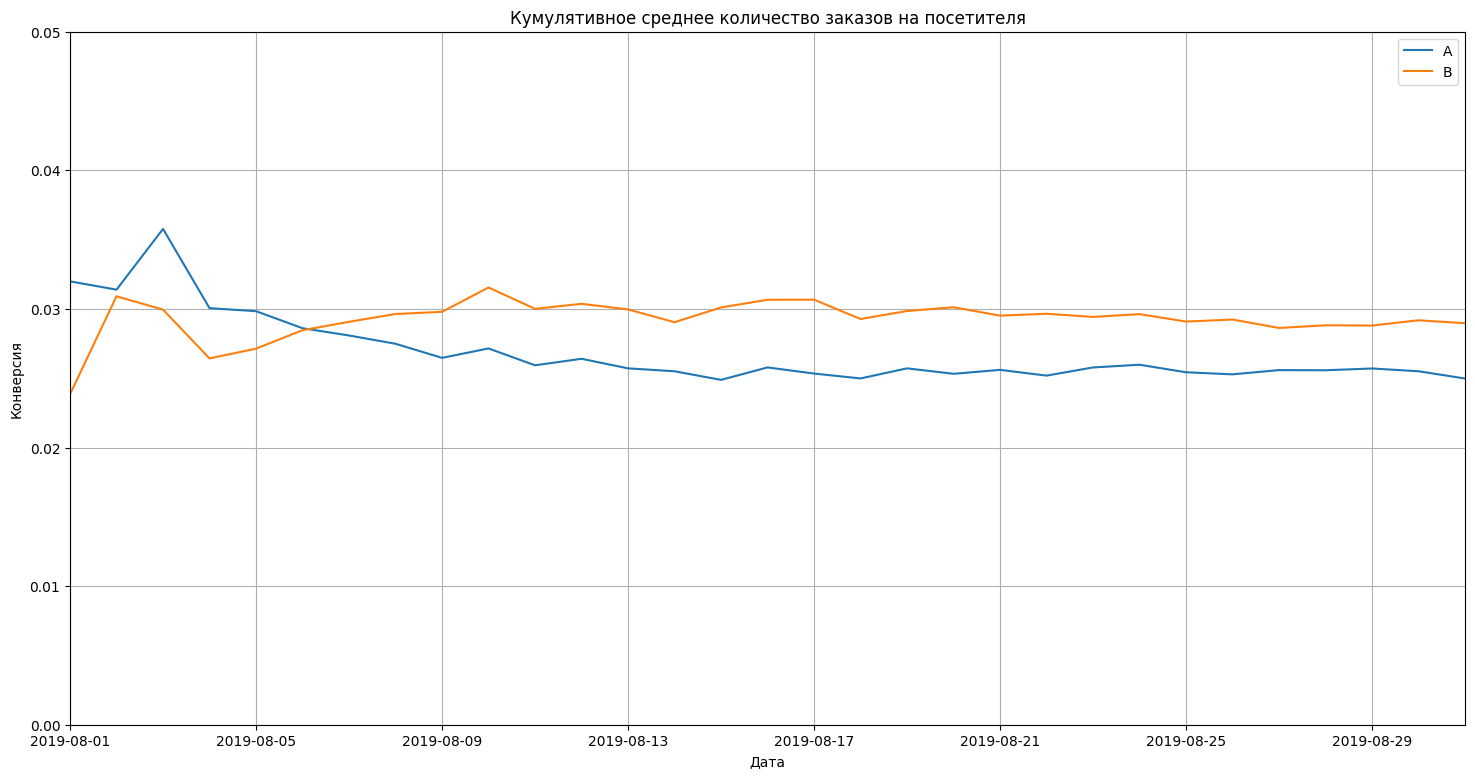

In [29]:
# считаем среднее количество заказов на посетителя
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# отделяем данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

# отделяем данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

# строим график
plt.figure(figsize=(18,9))
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')
plt.title('Кумулятивное среднее количество заказов на посетителя')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.grid()
plt.legend()

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.05]);

**Вывод**

Видим, что с 1 по 4 августа 2019 года среднее колмчество заказов на посетителя колебалось, затем ситауция стабилизировалась. Среднее количество заказов на посетителя в группе В выше чем в А.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

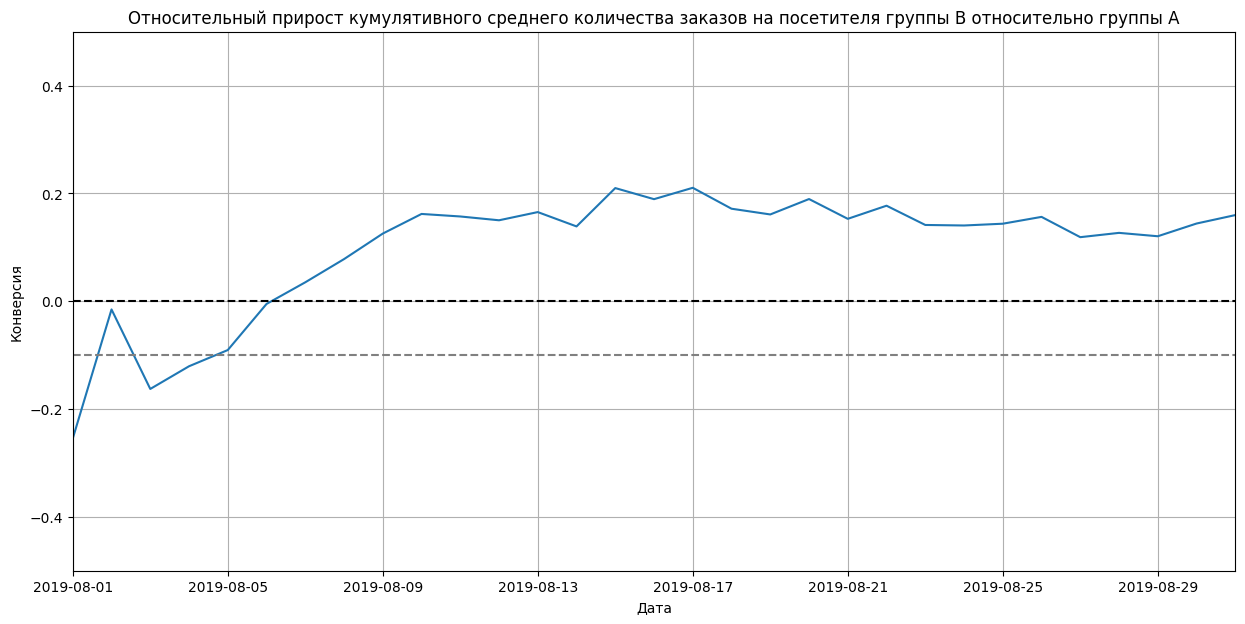

In [30]:
merged_cumulative_conversions = cumulative_data_a[['date','conversion']].merge(cumulative_data_b[['date','conversion']], 
                                                                               left_on='date', right_on='date', 
                                                                               how='left', suffixes=['_a', '_b'])
plt.figure(figsize=(15,7))
plt.plot(merged_cumulative_conversions['date'], merged_cumulative_conversions['conversion_b']/
         merged_cumulative_conversions['conversion_a']-1)
plt.title('Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.grid()


plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), -0.5, 0.5]);

**Вывод**

Видим, что среднее количество заказов на посетителя для группы B с 1 августа по 9 августа то растет, то падает, далее фиксируется в отметке примерно 10-21% конверсии. 

### Точечный график количества заказов по пользователям

In [31]:
orders_by_users = (orders.groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'}))
orders_by_users.columns = ['user_id', 'orders']
orders_by_users.sort_values(by='orders', ascending=False).head(10)

,user_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


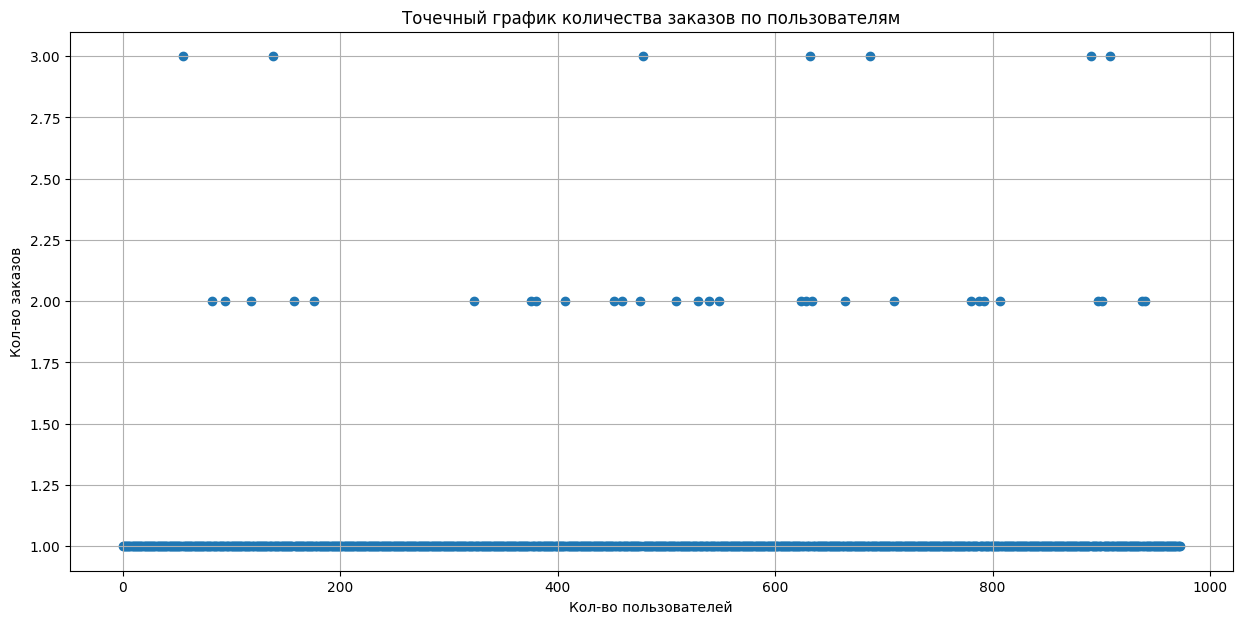

In [32]:
# строим график
plt.figure(figsize=(15,7))
x_values = pd.Series(range(0,len(orders_by_users)))
plt.scatter(x_values, orders_by_users['orders'])
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Кол-во пользователей')
plt.ylabel('Кол-во заказов')
plt.grid()

**Вывод**

Видим, что сновное количество заказов - 1, затем 2 и немного 3. Необходимо откинуть аномалии (от 1% до 5%).

### 95-й и 99-й перцентили количества заказов на пользователя

In [33]:
np.percentile(orders_by_users['orders'], [95, 99])

array([1., 2.])

**Вывод**

Не более 5% пользователей совершали более 1 заказа, и не более 1% - больше 2 заказов. Разумно выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

### Точечный график стоимостей заказов

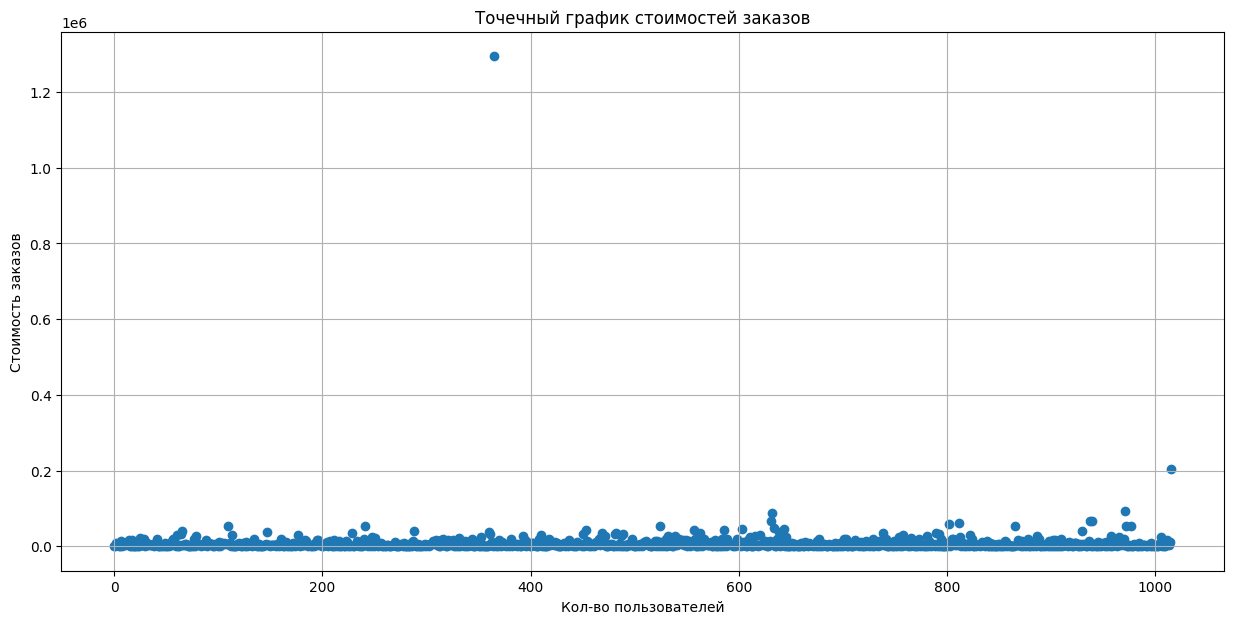

In [34]:
plt.figure(figsize=(15,7))
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Кол-во пользователей')
plt.ylabel('Cтоимость заказов')
plt.grid()
plt.show()

**Вывод**

Видим выбросы в районе 200000 и более 1200000, предполагаю, что скачки на графиках происходят из-за них.

### 95-й и 99-й перцентили стоимости заказов

In [35]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

**Вывод**

Не более, чем у 5% стоимость заказов превышает 26785 и не боллее у 1% cтоимость заказов превышает 53904. Значение 99 перцентиля возьмем как границу для определения аномальных заказов.

###  Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя между группами по «сырым» данным — без удаления аномальных пользователей. Сформулируем гипотезы. 

    Нулевая: различий в среднем количестве заказов между группами нет. 
    Альтернативная: различия в среднем между группами есть.
Подготовим данные.

Для проверки гипотез будем использовать непараметрический тест Уилкоксона-Манна-Уитни (он больше всего подойдет для наших данных). Для уровня значимости установим стандартный уровень, равный 0.05.

In [36]:
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

visitors_a_cummulative = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_a_cummulative.columns = ['date', 'visitors_cummulative_a']

visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

visitors_b_cummulative = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b']

orders_a_daily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

orders_a_cummulative = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_a_cummulative.columns = [
    'date',
    'orders_cummulative_a',
    'revenue_cummulative_a',
]

orders_b_daily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

orders_b_cummulative = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_b_cummulative.columns = [
    'date',
    'orders_cummulative_b',
    'revenue_cummulative_b',
]

data = (
    orders_a_daily.merge(
        orders_b_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Названия столбцов данных:

    date — дата;
    orders_per_date_a — количество заказов в выбранную дату в группе A;
    revenue_per_date_a — суммарная выручка в выбранную дату в группе A;
    orders_per_date_b — количество заказов в выбранную дату в группе B;
    revenue_per_date_b — суммарная выручка в выбранную дату в группе B;
    orders_cummulative_a — суммарное число заказов до выбранной даты включительно в группе A;
    revenue_cummulative_a — суммарная выручка до выбранной даты включительно в группе A;
    orders_cummulative_b — суммарное количество заказов до выбранной даты включительно в группе B;
    revenue_cummulative_b — суммарная выручка до выбранной даты включительно в группе B;
    visitor_perDate_a — количество пользователей в выбранную дату в группе A;
    visitors_perDate_b — количество пользователей в выбранную дату в группе B;
    visitors_cummulative_a — количество пользователей до выбранной даты включительно в группе A;
    visitors_cummulative_B — количество пользователей до выбранной даты включительно в группе B.

In [37]:
# посчитаем статистическую значимость различия в среднем количестве заказов между группами
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitor_id', 'orders']

sample_a = pd.concat(
    [
        orders_by_users_a['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b = pd.concat(
    [
        orders_by_users_b['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("P-value: {0:.3f}".format(stats.mannwhitneyu(sample_a, sample_b)[1]))

print("Относительный прирост В к А: {0:.3f}".format(sample_b.mean() / sample_a.mean() - 1))

P-value: 0.011
Относительный прирост В к А: 0.160


**Вывод**

P-value<0.05, значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительный прирост группы B к А равен 16%, значит различия в среднем между группами все-таки имеются.

### Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Теперь проверим статистическую значимость различий в среднем чеке между группами по «сырым» данным. 
    
    Нулевая гипотеза: различий в среднем чеке между группами нет. 
    Альтернативная гипотеза: различия в среднем чеке между группами есть. 
    
Для проверки гипотез будем использовать непараметрический тест Уилкоксона-Манна-Уитни (он больше всего подойдет для наших данных). Для уровня значимости установим стандартный уровень, равный 0.05.

In [38]:
print('P-value: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост В к А: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.829
Относительный прирост В к А: 0.287


**Вывод**

P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Также средний чек группы B значительно выше среднего чека группы A - 28.7% (на это видимо повлияли наши выбросы).

###  Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 53904. Так мы уберём 1% пользователей с наибольшим числом заказов и 5% пользователей с дорогими заказами. 

In [39]:
users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > 2]['visitor_id'],
        orders_by_users_b[orders_by_users_b['orders'] > 2]['visitor_id'],
    ],
    axis=0,
)
users_with_expensive_orders = orders[orders['revenue']>int(np.percentile(orders['revenue'], [99]))]['visitor_id']
abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormal_users.head(5))
print(abnormal_users.shape[0])

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
Name: visitor_id, dtype: int64
16


Всего 16 аномальных пользователей. 
Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. 

In [40]:
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('P-value: {0:.3f}'.format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))
print('Относительный прирост В к А: {0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1))

P-value: 0.007
Относительный прирост В к А: 0.189


**Вывод**

По "очищенным" данным также как и не по "очищенным" различия между группами A и B есть: p-value меньше 0.05, и нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, следует отвергнуть. Относительный выигрыш группы B немного увеличился и равен 18,9%. Группа В лучше группы А.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [41]:
print(
    'P-value: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительный прирост В к А:{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value: 0.788
Относительный прирост В к А:-0.032


**Вывод**

По "очищенным" данным также как и не по "очищенным" различия между группами A и B нет: p-value больше 0.05, и нулевую гипотезу о том, что различий в среднем чеке между группами нет, не отвергаем. Также видим изменения после чистки - средний чек группы B оказался на 3,2% ниже среднего чека группы A, в то время как по "сырым" данным, он был больше на 28,7%, что показывает вляние дорогих заказов.

## Общий вывод

1. Была проведена предобработка данных, а именно:
    заменили типы данных, где это требовалось;
    привели наименования столбцов к "хорошему" стилю;
    проверили на наличие пропущенных значений и дубликатов - было найденно 58 пользователей, которые находились в двух группах одновременно, были удаленны;
2. При применении фреймворка RICE выявили приоритетные гипотезы:
    Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
    Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.
  Рекоменадации отделу маркетинга обратить внимание в первую очередь на эти гипотезы.
3. Из анализа А/B теста было выясненно:
    Есть статистически значимое различие по среднему количеству заказов между группами по «сырым» и по данным после фильтрации аномалий;
    Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
    График различия среднего количества заказов между группами сообщает, что результаты группы B лучше группы A и нет значительной тенденции к ухудшению;
    График различия среднего чека до удаления аномалий колеблется: именно благодаря ему мы нашли аномалии. Сделать из этого графика определённые выводы нельзя.

Исходя из обнаруженных фактов, тест следует остановить и признать его успешным. Конверсия выросла, средний чек практически не изменился.Группа В лучше чем А, соответственно группа В приносит больше денежных средств бизнесу. Перейти к проверке следующей гипотезы.

Спасибо за внимание!